### Import library

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

### Using Scipy

In [2]:
data = pd.read_hdf('data/brfss.hdf5')

In [4]:
from scipy.stats import linregress

# Extract the variables
subset = data.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332, intercept_stderr=0.013196467544093602)


#### **Finding the best linear Line to fit the data. Also calculate the Linear Equation.**

>#### Correlation does not always measure what we really want to know. 

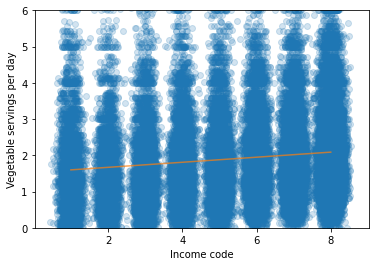

In [5]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope*fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

### Using Statsmodels
#### **Mostly used for ploy. Linear Regression**

In [6]:
# Reading the  Data
gss = pd.read_hdf('data/gss.hdf5')

In [6]:
import statsmodels.formula.api as smf

results = smf.ols('realinc ~ educ', data=gss).fit()

print(results.params)

Intercept   -11539.147837
educ          3586.523659
dtype: float64


### **We can see for each education level the income raised by $3586.** 

#### **Relationship between income and education is non-linear.** And try to **interpret the Income**.

In [8]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2
gss['age2'] = gss['age'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


#### **Making Prediction**

In [9]:
# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2
display(df.head())
# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

,educ,age,educ2,age2
0,0.000000,30,0.000000,900
1,0.408163,30,0.166597,900
2,0.816327,30,0.666389,900
3,1.224490,30,1.499375,900
4,1.632653,30,2.665556,900


0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


### **Visualize the Prediction**

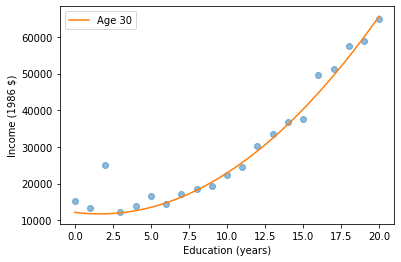

In [10]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)


# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### **Dealing with Categorical Values**

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


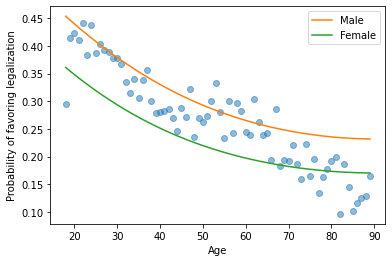

In [11]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()